In [1]:
from hydra.utils import instantiate 
from hydra import initialize, compose, initialize_config_dir
import matplotlib.pyplot as plt
from awesome_ssl.models import byol 
import torch
from torch.utils.data import DataLoader, ConcatDataset
from awesome_ssl.datasets.dataloader_utils import make_dataset


In [2]:
# get dataset
def instantiate_dataset(ds_config): 
    config_path = "../configs"
    with initialize(config_path): 
        dataset = make_dataset(ds_config)
        return dataset

def show_image(image): 
    plt.figure()
    return plt.imshow(image.permute(1, 2, 0))

In [4]:
with initialize("../configs"): 
    config = compose(config_name="train_dataset/imagenet.yaml") 
print(config)

{'train_dataset': {'_target_': 'torchvision.datasets.ImageFolder', 'root': '/mnt/nfs/datasets/imagenet-pytorch/train', 'transform': {'_target_': 'torchvision.transforms.Compose', 'transforms': [{'_target_': 'torchvision.transforms.Resize', 'size': 224}, {'_target_': 'torchvision.transforms.CenterCrop', 'size': 224}, {'_target_': 'torchvision.transforms.ToTensor'}]}}}


# Loading config


In [3]:
def instantiate_config(exp_name, override=[]): 
    config_path = "../configs"
    with initialize(config_path): 
        config = compose(config_name="config", overrides=[f"+experiment={exp_name}"] + override)
        return config

In [4]:
override=["train_dataset=function", 
          "train_dataset.func_object=\"concat_datasets(['train_dataset/imagenette.yaml', subset_dataset('train_dataset/places.yaml', 1000)])\"", 
          "val_dataset=imagenette_val.yaml"]

train_configs = instantiate_config("pretrain_byol", override).train_dataset

In [5]:
print(train_configs)

{'func_object': "concat_datasets(['train_dataset/imagenette.yaml', subset_dataset('train_dataset/places.yaml', 1000)])"}


In [6]:
dset = instantiate_dataset(train_configs)

{'func_object': "concat_datasets(['train_dataset/imagenette.yaml', subset_dataset('train_dataset/places.yaml', 1000)])"}
concat_datasets(['train_dataset/imagenette.yaml', subset_dataset('train_dataset/places.yaml', 1000)])
12780
1000


torch.Size([32])


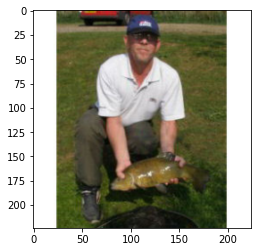

In [9]:
dloader = DataLoader(dset, batch_size=32)
im, label = next(iter(dloader))
show_image(im[0])
print(label.shape)

# Examine Dataset

In [4]:
train_dataset = instantiate_dataset("train_dataset/imagenette.yaml").train_dataset

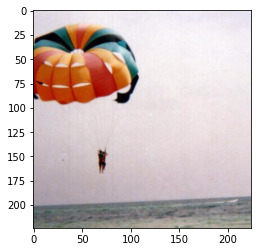

In [24]:
show_image(train_dataset[12004][0])

# Examine Model


In [ ]:
checkpoint_path = "/mnt/nfs/home/yunxingl/self-supervised-learning/outputs/2021-10-19/17-47-51/BYOL/16rxz5ub/checkpoints/epoch=9-step=64049.ckpt"
model = byol.BYOL.load_from_checkpoint(checkpoint_path).eval()
val_dataset = instantiate_dataset("val_dataset/imagenet_val.yaml").val_dataset

In [ ]:
def compute_square_distance(im1, im2):
    embed_1 = model.prediction_head(model.online_encoder(im1.unsqueeze(0)))
    embed_2 = model.prediction_head(model.online_encoder(im2.unsqueeze(0)))
    return torch.norm(embed_1 - embed_2)

In [ ]:
image_1, label_1 = val_dataset[2000]
image_2, label_2 = val_dataset[2001]
image_3, label_3 = val_dataset[8001]
image_4, label_4 = val_dataset[12005]
print(label_1, label_2, label_3, label_4)
show_image(image_1)
show_image(image_2)
show_image(image_3)
show_image(image_4)

In [ ]:
print(compute_square_distance(image_1, image_2))

In [ ]:
print(compute_square_distance(image_2, image_3))
print(compute_square_distance(image_2, image_4))
print(compute_square_distance(image_3, image_4))
print(compute_square_distance(image_1, image_3))
print(compute_square_distance(image_1, image_4))